A. Teboul, 2022, Heart Disease Health Indicators Dataset, Kaggle. [Online]. Available: https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import seaborn as sns

# 1. Data loading

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving heart_disease_health_indicators_BRFSS2015.csv to heart_disease_health_indicators_BRFSS2015.csv


In [ ]:
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


# 2. Data Cleaning

Checking null value in the dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

# 3. Data Preprocessing

**3.1 Sampling Instance**

random sampling to randomly select only 20,000 instances for this project becuase the orginal dataset is too large and we don't have enough resource to train the whole samples

In [ ]:
rand_samples = df.sample(20000)

**3.2 Imbalance data**

In [ ]:
# Check class distribution for positive and negative cases
rand_samples.groupby(['HeartDiseaseorAttack']).size()

HeartDiseaseorAttack
0.0    18134
1.0     1866
dtype: int64

There are imbalance problem in the dataset, where  number above display a large gap between number of two different cases. This may affect the prediction of model from bias over the overnumber outcome. Therefore, we apply SMOTE which is an oversampling technique to balance between number of positive and negative cases.

In [ ]:
# Define X and y
X = rand_samples.drop(columns='HeartDiseaseorAttack')
y = rand_samples['HeartDiseaseorAttack']

In [ ]:
# Perform SMOTE over sampling technique to boost number of positive outcome. Therefore, data will be evenly distributed between positive and negative outcome.
oversample = SMOTE(random_state=42)
X, y = oversample.fit_resample(X, y)
Counter(y)

Counter({1.0: 18134, 0.0: 18134})

**3.3 Feature Selection**

B. Prashant. "Comprehensive Guide on Feature Selection." Kaggle.com. https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection (accessed Apr. 7, 2024)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)
selected_indices = selector.get_support(indices=True)
selected_feature = X.columns[selected_indices]
X_selected = pd.DataFrame(X_selected, columns=selected_feature)
X_selected

,HighBP,HighChol,Smoker,Stroke,Diabetes,GenHlth,PhysHlth,DiffWalk,Age,Income
0,1.000000,1.000000,0.000000,0.000000,2.000000,5.000000,2.0,0.000000,8.000000,8.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,7.000000,7.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,4.000000,8.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.0,0.000000,10.000000,5.000000
4,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.0,0.000000,10.000000,8.000000
...,...,...,...,...,...,...,...,...,...,...
36263,0.644864,0.355136,0.355136,0.000000,2.000000,2.710272,5.0,0.355136,11.355136,8.000000
36264,0.216240,0.216240,1.000000,0.000000,2.000000,3.783760,0.0,0.783760,9.567519,3.000000
36265,1.000000,0.483297,1.000000,0.000000,1.033407,5.000000,30.0,1.000000,13.000000,4.516703
36266,1.000000,0.715204,1.000000,0.715204,1.430407,4.000000,15.0,1.000000,10.139186,1.284796


**3.4 Scaling**

StandardScaler to scale these values

In [ ]:
scaler = StandardScaler()
X_selected = scaler.fit_transform(X_selected)

**3.5 Train-Test split**

In [ ]:
#split data into train and test set by 70-30 ratio and with random state
X_train, X_test, y_train, y_test = train_test_split(X_selected,y, test_size=0.3, random_state=1)

# 4. Hyperparameter Tuning

**Random Search**

J. Brownlee. "Hyperparameter Optimization With Random Search and Grid Search." machinelearningmastery.com. https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/ (accessed Apr.7, 2024)

**Parameter**

Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

In [ ]:
# For Decision Tree Hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

param_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': [None, 'balanced'],
}

decisiontree_classifier = DecisionTreeClassifier()

#RandomSeach
random_search_dt = RandomizedSearchCV(
    decisiontree_classifier, param_distributions=param_dt, n_iter=100,
    scoring='accuracy', n_jobs=-1, cv=5, verbose=1, random_state=0
)
random_search_dt.fit(X_train, y_train)
print("Best Hyperparameters:", random_search_dt.best_params_)

# Evaluate the best model on the test set
dt_model = random_search_dt.best_estimator_
accuracy_dt = dt_model.score(X_test, y_test)
y_pred_dt = dt_model.predict(X_test)
print(classification_report(y_test, y_pred_dt))
print(f"Test Accuracy: {accuracy_dt:.2f}")
print("Best score: ", random_search_dt.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 10, 'splitter': 'best'}
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      5482
         1.0       0.90      0.88      0.89      5399

    accuracy                           0.89     10881
   macro avg       0.89      0.89      0.89     10881
weighted avg       0.89      0.89      0.89     10881

Test Accuracy: 0.89
Best score:  0.8903768146208103


In [ ]:
# For AdaBoost Hyperparameter tuning
from sklearn.ensemble import AdaBoostClassifier

param_ada = {
    'n_estimators': randint(10, 100),
    'learning_rate': uniform(0.01, 0.3),
}
#note: base learner is decision tree

ada_classifier = AdaBoostClassifier()

#RandomSeach
random_search_ada = RandomizedSearchCV(
    ada_classifier, param_distributions=param_ada, n_iter=100,
    scoring='accuracy', n_jobs=-1, cv=5, verbose=1, random_state=0
)
random_search_ada.fit(X_train, y_train)
print("Best Hyperparameters:", random_search_ada.best_params_)

# Evaluate the best model on the test set
ada_model = random_search_ada.best_estimator_
accuracy_ada = ada_model.score(X_test, y_test)
y_pred_ada = ada_model.predict(X_test)
print(classification_report(y_test, y_pred_ada))
print(f"Test Accuracy: {accuracy_ada:.2f}")
print("Best score: ", random_search_ada.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'learning_rate': 0.27100364447404574, 'n_estimators': 92}
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88      5482
         1.0       0.86      0.90      0.88      5399

    accuracy                           0.88     10881
   macro avg       0.88      0.88      0.88     10881
weighted avg       0.88      0.88      0.88     10881

Test Accuracy: 0.88
Best score:  0.8814747958244918


In [ ]:
# For XGBoost Hyperparameter tuning
from scipy.stats import uniform, randint
from xgboost import XGBClassifier

param_xgb = {
    'n_estimators': randint(10,100),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'gamma': uniform(0, 0.5)
}
#note: base learner is decision tree

xgb_classifier = XGBClassifier()

#RandomSeach
random_search_xgb = RandomizedSearchCV(
    xgb_classifier, param_distributions=param_xgb, n_iter=100,
    scoring='accuracy', n_jobs=-1, cv=5, verbose=1, random_state=0
)
random_search_xgb.fit(X_train, y_train)
print("Best Hyperparameters:", random_search_xgb.best_params_)

# Evaluate the best model on the test set
xgb_model = random_search_xgb.best_estimator_
accuracy_xgb = xgb_model.score(X_test, y_test)
y_pred_xgb = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))
print(f"Test Accuracy: {accuracy_xgb:.2f}")
print("Best score: ", random_search_xgb.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'gamma': 0.3219950996148187, 'learning_rate': 0.1371565145674539, 'max_depth': 6, 'n_estimators': 80}
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      5482
         1.0       0.98      0.90      0.94      5399

    accuracy                           0.94     10881
   macro avg       0.94      0.94      0.94     10881
weighted avg       0.94      0.94      0.94     10881

Test Accuracy: 0.94
Best score:  0.9398905069879738


In [ ]:
# For bagging Hyperparameter tuning
from sklearn.ensemble import BaggingClassifier

param_bagging = {
    'n_estimators': randint(10, 100),
    'max_samples': randint(10, 100),
    'max_features': randint(2, 10),
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

bagging_classifier = BaggingClassifier()

#RandomSeach
random_search_bagging = RandomizedSearchCV(
    bagging_classifier, param_distributions=param_bagging, n_iter=100,
    scoring='accuracy', n_jobs=-1, cv=5, verbose=1, random_state=0
)
random_search_bagging.fit(X_train, y_train)
print("Best Hyperparameters:", random_search_bagging.best_params_)

# Evaluate the best model on the test set
bagging_model = random_search_bagging.best_estimator_
accuracy_bagging = bagging_model.score(X_test, y_test)
y_pred_bagging = bagging_model.predict(X_test)
print(classification_report(y_test, y_pred_bagging))
print(f"Test Accuracy: {accuracy_bagging:.2f}")
print("Best score: ", random_search_bagging.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'bootstrap': True, 'bootstrap_features': True, 'max_features': 2, 'max_samples': 89, 'n_estimators': 99}
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.89      5482
         1.0       0.95      0.81      0.87      5399

    accuracy                           0.88     10881
   macro avg       0.89      0.88      0.88     10881
weighted avg       0.89      0.88      0.88     10881

Test Accuracy: 0.88
Best score:  0.8828535007516776


# 5. Proposed Model

Proposed Model: optimized Stacking with tuned XGBoost, Bagging, AdaBoost, and Decision tree as base learner (Final estimator = XGBoost)

In [ ]:
from sklearn.ensemble import StackingClassifier

# 1st base learner: Tuned Decision tree
dt_best_hyperparameters = {
    'class_weight': 'balanced',
    'criterion': 'gini',
    'max_depth': 9,
    'max_features': None,
    'min_samples_leaf': 6,
    'min_samples_split': 10,
    'splitter': 'best'
}
dt_tuned = DecisionTreeClassifier()
dt_tuned.set_params(**dt_best_hyperparameters)


# 2nd base learner: Tuned AdaBoost
ada_best_hyperparameters = {
    'learning_rate': 0.27100364447404574,
    'n_estimators': 92
}
ada_tuned = AdaBoostClassifier()
ada_tuned.set_params(**ada_best_hyperparameters)

#3rd base learner: Tuned XGB
xbg_best_hyperparameters = {
   'gamma': 0.3219950996148187,
   'learning_rate': 0.1371565145674539,
   'max_depth': 6,
   'n_estimators': 80
}
xgb_tuned = XGBClassifier()
xgb_tuned.set_params(**xbg_best_hyperparameters)

#4th base learner: Tuned Bagging
bagging_best_hyperparameters = {
    'bootstrap': True,
    'bootstrap_features': True,
    'max_features': 2,
    'max_samples': 89,
    'n_estimators': 99
}
bagging_tuned = BaggingClassifier()
bagging_tuned.set_params(**bagging_best_hyperparameters)


#Base Classifier
estimators = [
    ('xgb', xgb_tuned),
    ('ada', ada_tuned),
    ('bagging', bagging_tuned),
    ('dt', dt_tuned)
]

#StackingClassifier
proposed_stack = StackingClassifier(estimators=estimators,final_estimator = xgb_tuned)
proposed_stack.fit(X_train,y_train)
proposed_pred = proposed_stack.predict(X_test)
proposed_acc = accuracy_score(proposed_pred, y_test)
print("Accuracy: {:.4%}".format(proposed_acc))
print(classification_report(y_test, proposed_pred))

Accuracy: 94.1825%
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      5482
         1.0       0.98      0.90      0.94      5399

    accuracy                           0.94     10881
   macro avg       0.95      0.94      0.94     10881
weighted avg       0.94      0.94      0.94     10881



# 6. Evaluation

**6.1 Performance of proposed model**

In [ ]:
print("Proposed Model Testing Results\n")
print(classification_report(y_test, proposed_pred))

Proposed Model Testing Results

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      5482
         1.0       0.98      0.90      0.94      5399

    accuracy                           0.94     10881
   macro avg       0.95      0.94      0.94     10881
weighted avg       0.94      0.94      0.94     10881



J. Murel. "Create a confusion matrix with Python." developer.ibm.com. Accessed: Apr.10, 2024. [Online]. Available: https://developer.ibm.com/tutorials/awb-confusion-matrix-python/

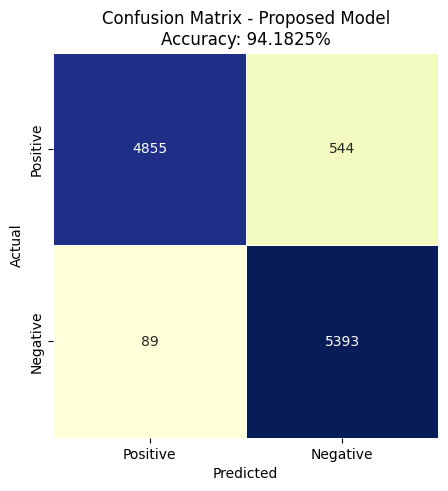

In [ ]:
# Confusion matrix: Proposed Model
from sklearn.metrics import confusion_matrix

conf_matrix_proposed = confusion_matrix(y_test, proposed_pred, labels=[1, 0])

TP = conf_matrix_proposed[0, 0]
FP = conf_matrix_proposed[0, 1]
FN = conf_matrix_proposed[1, 0]
TN = conf_matrix_proposed[1, 1]

plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_proposed, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, cbar=False, square=True,
            xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - Proposed Model\nAccuracy: {proposed_acc:.4%}')
plt.show()

**6.2 Proposed model against benchmarks**

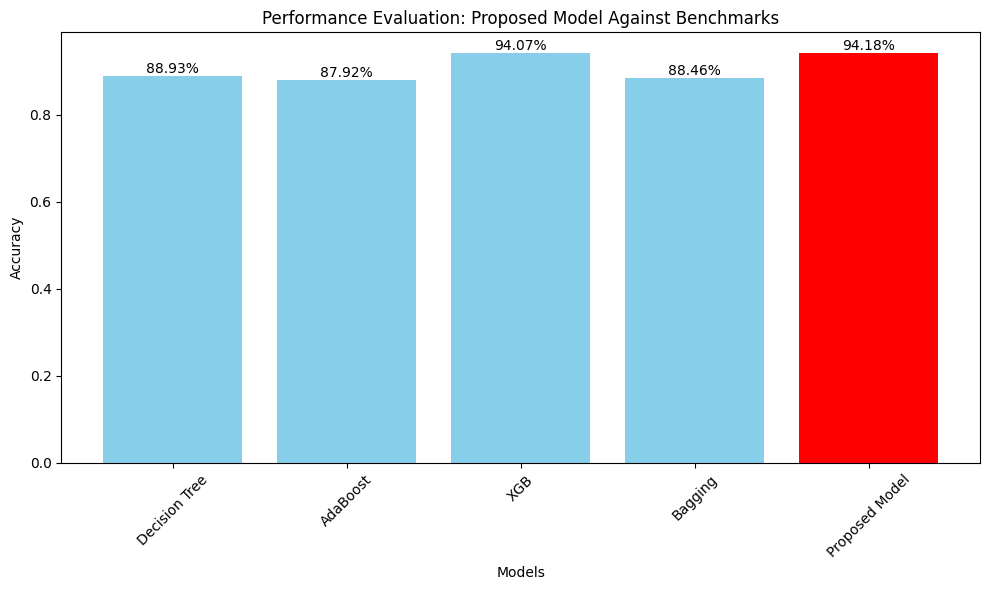

In [ ]:
import matplotlib.pyplot as plt

# Models and their accuracies
models = ['Decision Tree','AdaBoost','XGB','Bagging','Proposed Model']
accuracies = [accuracy_dt, accuracy_ada, accuracy_xgb, accuracy_bagging, proposed_acc]

plt.figure(figsize=(10, 6))
for i in range(len(models)):
    if models[i] == 'Proposed Model':
        plt.bar(models[i], accuracies[i], color='red')
    else:
        plt.bar(models[i], accuracies[i], color='skyblue')

plt.title('Performance Evaluation: Proposed Model Against Benchmarks')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Displaying the accuracies
for i in range(len(models)):
    plt.text(i, accuracies[i], f'{accuracies[i]*100:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**6.3 ROC-AUC of Proposed Model**

ProjectPro. "How to plot a ROC Curve in Python?." projectpro.io. Accessed: Apr.10, 2024. [Online]. Available: https://www.projectpro.io/recipes/plot-roc-curve-in-python

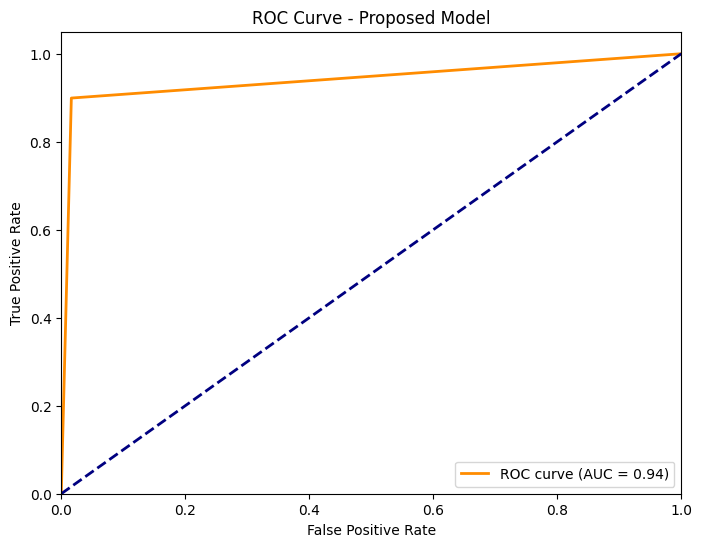

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, proposed_pred)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Proposed Model')
plt.legend(loc='lower right')
plt.show()